In [25]:
import pandas as pd
import numpy as np
import pathlib
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from model.threshold_guess import compute_thresholds, cut
from model.gosdt import GOSDT
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report, precision_score, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score1

In [ ]:
#2 classes

In [29]:
source = pd.read_csv("../experiments/datasets/final_H358_.csv")
target = pd.read_csv("../experiments/datasets/final_H355_.csv")
source.loc[source[source.labels.isin([2.0, 3.0,4.0])].index, 'labels']=1.0
target.loc[target[target.labels.isin([2.0, 3.0,4.0])].index, 'labels']=1.0
ys = source.labels
Xs= source.drop(['Time', 'labels'], axis=1)
yt = target.labels
Xt= target.drop(['Time', 'labels'], axis=1)
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(Xt, yt, test_size=0.85,  stratify=yt,random_state = 42)


In [31]:
# set GOSDT configuration
config = {
            "regularization": 0.02, # regularization penalizes the tree with more leaves. We recommend to set it to relative high value to find a sparse tree.  
            "depth_budget": 6,
            "time_limit": 50, # training time limit in seconds
            "similar_support": False
        }

model = GOSDT(config)

# train GOSDT 
model.fit(Xs, ys)
print("evaluate the model, extracting tree and scores", flush=True)
model.fit(X_train_t, y_train_t)
acc = model.score(X_test_t, y_test_t)
y_pred = model.predict(X_test_t)


precision, recall, fscore, support = score1(y_test_t, y_pred)
roc = roc_auc_score(y_test_t, y_pred)
f1_weighted = f1_score(y_test_t,y_pred, average='weighted')
print("Model accuracy: {}".format(acc))
print('roc auc:', roc)
print('Weighted F1 score: ', f1_weighted)
print('precision:', precision)
print('recall;', recall)
print('fscore:', fscore)
print('support:', support)
cm = confusion_matrix(y_test_t, y_pred)
print("Confusion Matrix ser original:")
print(cm)
n_leaves = model.leaves()
n_nodes = model.nodes()

#print("# of leaves: {}".format(n_leaves))
print(model.tree)

gosdt reported successful execution
training completed. 0.000/0.000/0.428 (user, system, wall), mem=0 MB
bounds: [0.079583..0.079583] (0.000000) loss=0.039583, iterations=605
evaluate the model, extracting tree and scores
gosdt reported successful execution
training completed. 0.000/0.000/10.840 (user, system, wall), mem=0 MB
bounds: [0.091250..0.091250] (0.000000) loss=0.031250, iterations=55929
Model accuracy: 0.9383259911894273
roc auc: 0.9267687766163376
Weighted F1 score:  0.9385471087059268
precision: [0.96153846 0.87984496]
recall; [0.9527439  0.90079365]
fscore: [0.95712098 0.89019608]
support: [656 252]
Confusion Matrix ser original:
[[625  31]
 [ 25 227]]
if 11.625 <= Power and 505.0 <= co2 then:
    predicted class: 1
    misclassification penalty: 0.013
    complexity penalty: 0.02

else if Power < 11.625 and 505.0 <= co2 then:
    predicted class: 0
    misclassification penalty: 0.019
    complexity penalty: 0.02

else if co2 < 505.0 then:
    predicted class: 0
    miscl

In [ ]:
#3 classes

In [23]:

source = pd.read_csv("../experiments/datasets/final_H358_.csv")
target = pd.read_csv("../experiments/datasets/final_H355_.csv")
source.loc[source[source.labels.isin([ 3.0,4.0])].index, 'labels']=2.0
target.loc[target[target.labels.isin([ 3.0,4.0])].index, 'labels']=2.0
ys = source.labels
Xs= source.drop(['Time', 'labels'], axis=1)
yt = target.labels
Xt= target.drop(['Time', 'labels'], axis=1)
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(Xt, yt, test_size=0.85,  stratify=yt,random_state = 42)


In [27]:
# set GOSDT configuration
config = {
            "regularization": 0.02, # regularization penalizes the tree with more leaves. We recommend to set it to relative high value to find a sparse tree.  
            "depth_budget": 6,
            "time_limit": 180, # training time limit in seconds
            "similar_support": False
        }

model = GOSDT(config)

# train GOSDT 
model.fit(Xs, ys)
print("evaluate the model, extracting tree and scores", flush=True)
model.fit(X_train_t, y_train_t)
acc = model.score(X_test_t, y_test_t)
y_pred = model.predict(X_test_t)


precision, recall, fscore, support = score1(y_test_t, y_pred)
f1_weighted = f1_score(y_test_t,y_pred, average='weighted')
print("Model accuracy: {}".format(acc))
print('Weighted F1 score: ', f1_weighted)
print('precision:', precision)
print('recall;', recall)
print('fscore:', fscore)
print('support:', support)
cm = confusion_matrix(y_test_t, y_pred)
print("Confusion Matrix ser original:")
print(cm)
n_leaves = model.leaves()
n_nodes = model.nodes()

#print("# of leaves: {}".format(n_leaves))
print(model.tree)

gosdt reported possible timeout.
training completed. -1.000/-1.000/-1.000 (user, system, wall), mem=0 MB
bounds: [0.060000..0.181667] (0.121667) loss=0.109722, iterations=19999
evaluate the model, extracting tree and scores
gosdt reported possible timeout.
training completed. -1.000/-1.000/-1.000 (user, system, wall), mem=0 MB
bounds: [0.060000..0.196250] (0.136250) loss=0.093750, iterations=79999
Model accuracy: 0.8303964757709251
Weighted F1 score:  0.8300362779033952
precision: [0.94883721 0.5530303  0.52671756]
recall; [0.93292683 0.44785276 0.7752809 ]
fscore: [0.94081476 0.49491525 0.62727273]
support: [656 163  89]
Confusion Matrix ser original:
[[612  43   1]
 [ 29  73  61]
 [  4  16  69]]
if 32.0 <= Power then:
    predicted class: 2
    misclassification penalty: 0.038
    complexity penalty: 0.02

else if 12.75 <= Power < 32.0 then:
    predicted class: 1
    misclassification penalty: 0.031
    complexity penalty: 0.02

else if Power < 12.75 then:
    predicted class: 0
   

Micro-averaged One-vs-Rest ROC AUC score:
0.8728
Macro-averaged One-vs-Rest ROC AUC score:
0.8117


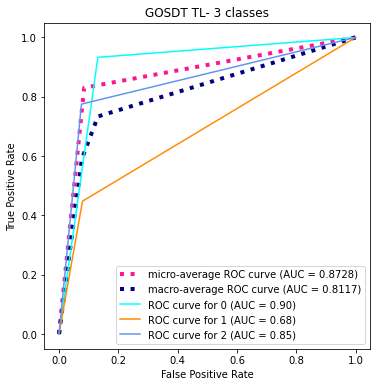

In [28]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import RocCurveDisplay
label_binarizer = LabelBinarizer().fit(y_test_t)
y_onehot_test = label_binarizer.transform(y_test_t)
y_onehot_test.shape  # (n_samples, n_classes)
label_binarizer.transform([0])

import matplotlib.pyplot as plt

y_pred_onehot = label_binarizer.transform(y_pred)



from itertools import cycle

fig, ax = plt.subplots(figsize=(6, 6))


from sklearn.metrics import auc, roc_curve
n_classes = 3
# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_pred_onehot.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.4f}")
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.4f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)


for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_pred_onehot[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)

for i in range(n_classes):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

# Average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.4f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.4f}")
colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for class_id, color in zip(range(3), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_pred_onehot[:, class_id],
        name=f"ROC curve for {class_id}",
        color=color,
        ax=ax,
        #plot_chance_level=(class_id == 2),
    )

plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("GOSDT TL- 3 classes")
plt.legend()
plt.show()